In [1]:
import sys
# append to path the folder that contains the analytic scanner
sys.path.append('../ESA/GaiaLab/gaialab')

import frame_transformations as ft
from scanner import Scanner
from satellite import Satellite
from source import Source
from solver import compute_design_equation

import constants as const

import quaternion
from agis import Agis
from agis import Calc_source
import agis_functions as af
import helpers as helpers

import numpy as np

import astropy.units as units
import matplotlib.pyplot as plt
import astropy.units as units

In [2]:
t_init = 0 
t_end =  365*5
my_dt = 1/24 # [days]
gaia = Satellite(ti=t_init, tf=t_end, dt= my_dt)

In [3]:
zero_color = lambda t: 0
sirio = Source("sirio", 101.28, -16.7161, 379.21, -546.05, -1223.14, 0, func_color=zero_color, mean_color=0 )

In [4]:
np.random.seed(seed=1)  # numpy seed set to increase reproducibility
my_observations = np.random.randint(low=t_init, high=t_end, size=100)
my_observations = np.sort(my_observations)

In [5]:
calc_s =  Calc_source(obs_times=my_observations, source=sirio)

In [6]:
dR_ds_AL, dR_ds_AC, R_AL, R_AC, FA = compute_design_equation(sirio,calc_s,my_observations, gaia)  

In [7]:
calc_s.compute_u(gaia,1)

array([-0.18733957,  0.9392407 , -0.2876296 ])

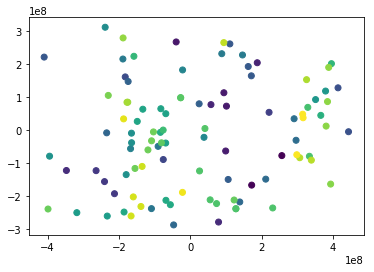

In [8]:
plt.scatter(FA[:,0]*units.rad.to(units.mas),FA[:,1]*units.rad.to(units.mas),c=my_observations)